<a href="https://colab.research.google.com/github/Dev-coder-sudo/Data-Science-Projects/blob/main/UberDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar


In [3]:
df = pd.read_csv('/content/Uber Drives - .csv')

In [4]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [6]:
df.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [7]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [10]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [11]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'],format = '%m/%d/%Y %H:%M')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format = '%m/%d/%Y %H:%M')

<ipython-input-11-d3b1921e33db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['START_DATE*'] = pd.to_datetime(df['START_DATE*'],format = '%m/%d/%Y %H:%M')
<ipython-input-11-d3b1921e33db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format = '%m/%d/%Y %H:%M')


In [12]:
df['START_DATE*']

0      2016-01-01 21:11:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
4      2016-01-06 14:42:00
5      2016-01-06 17:15:00
               ...        
1150   2016-12-31 01:07:00
1151   2016-12-31 13:24:00
1152   2016-12-31 15:03:00
1153   2016-12-31 21:32:00
1154   2016-12-31 22:08:00
Name: START_DATE*, Length: 653, dtype: datetime64[ns]

In [13]:
hour = []
day = []
month = []
dayofweek = []
weekday = []

for x in df['START_DATE*']:
  hour.append(x.hour)
  day.append(x.day)
  month.append(x.month)
  dayofweek.append(x.dayofweek)
  weekday.append(calendar.day_name[dayofweek[-1]])

df['HOUR'] = hour
df['DAY'] = day
df['MONTH'] = month
df['DAY_OF_WEEK'] = dayofweek
df['WEEKDAY'] = weekday


In [14]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,MONTH,DAY_OF_WEEK,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,2,Wednesday


# **Categories We Have**

In [15]:
df['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

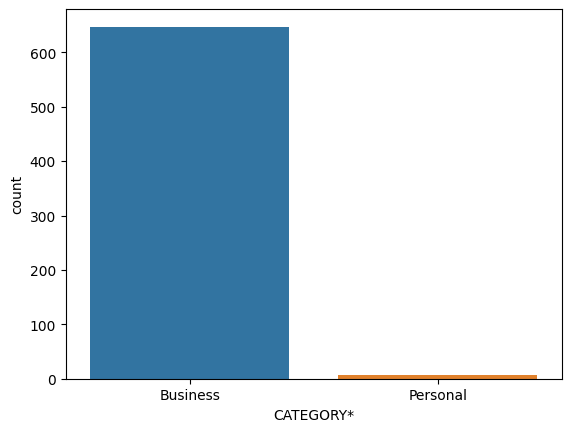

In [16]:
sns.countplot(x = 'CATEGORY*', data = df)

In [17]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,MONTH,DAY_OF_WEEK,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,2,Wednesday


# **How long do people travel with Uber?**

<Axes: ylabel='Frequency'>

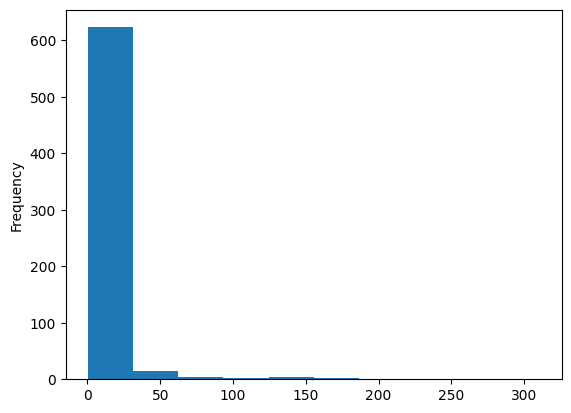

In [18]:
df['MILES*'].plot.hist()

# **What Hour Do Most People Take Uber To Their Destination?**

Text(0.5, 1.0, 'No. of trips vs Hours')

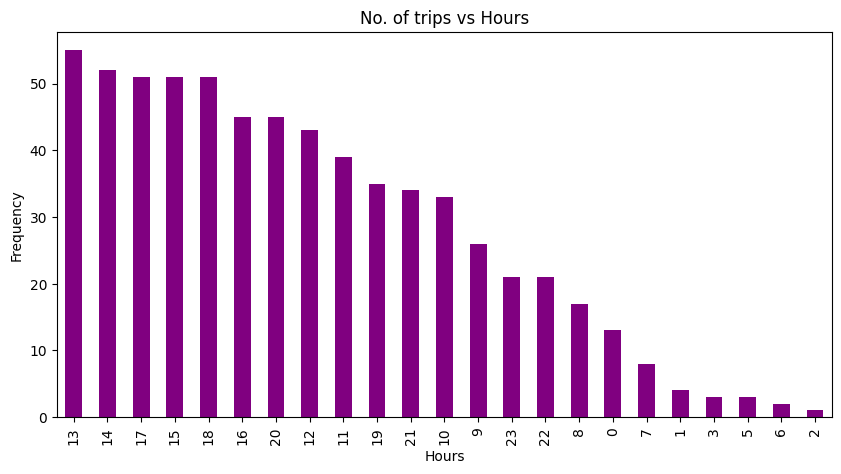

In [20]:
hours = df['HOUR'].value_counts()
hours.plot(kind='bar',figsize = (10,5),color="purple")
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title("No. of trips vs Hours")

As we can see most people take Uber to their destination around the 13th hour(1pm) and the least hour is 2 am.

# **Check The Purpose Of Trips**




<Axes: >

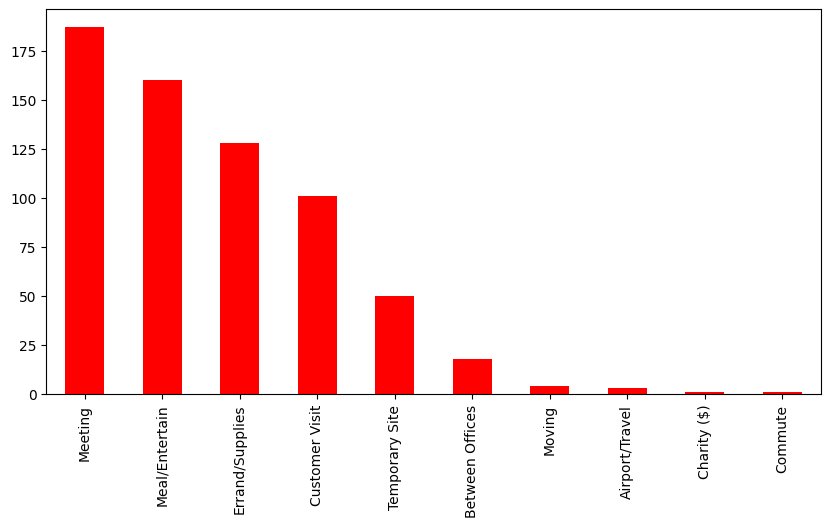

In [22]:
df['PURPOSE*'].value_counts().plot(kind='bar', figsize=(10,5),color='red')

# **Which Day Has The Highest Number Of Trips**

<Axes: >

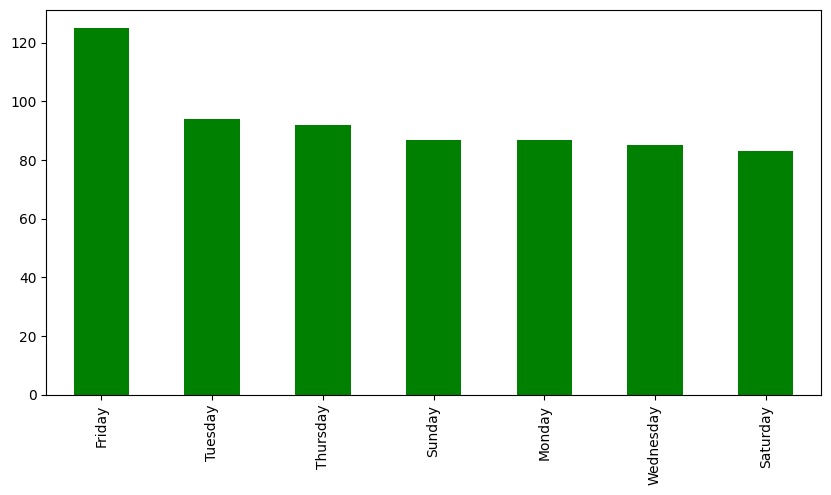

In [23]:
df['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

# **What Are The Number Of Trips Per Each Day?**

<Axes: >

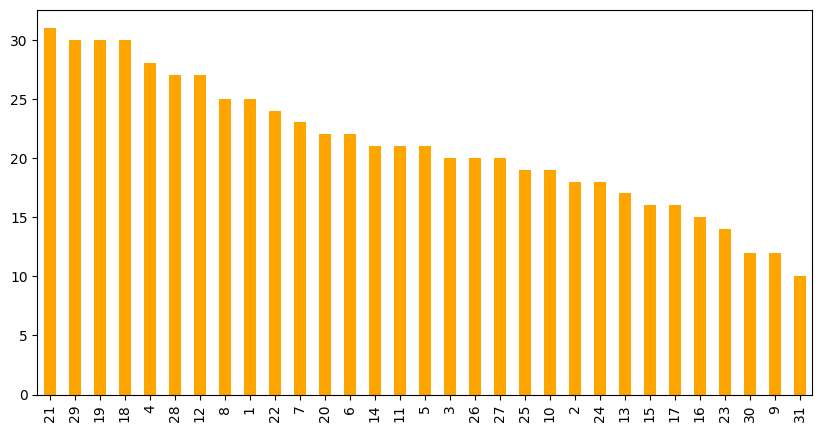

In [25]:
df['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='orange')

# **What Are The Trips In The Month**

<Axes: >

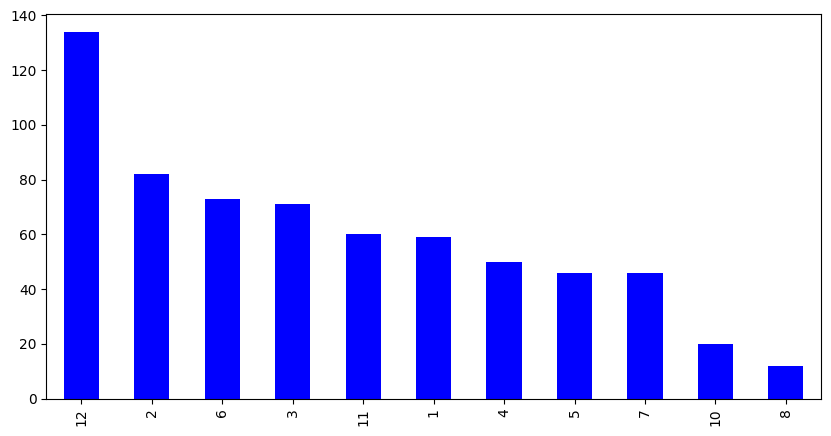

In [26]:
df['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

# **The starting points of trips. Where Do People Start Boarding Their Trip From Most?**

In [27]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,MONTH,DAY_OF_WEEK,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,2,Wednesday


<Axes: >

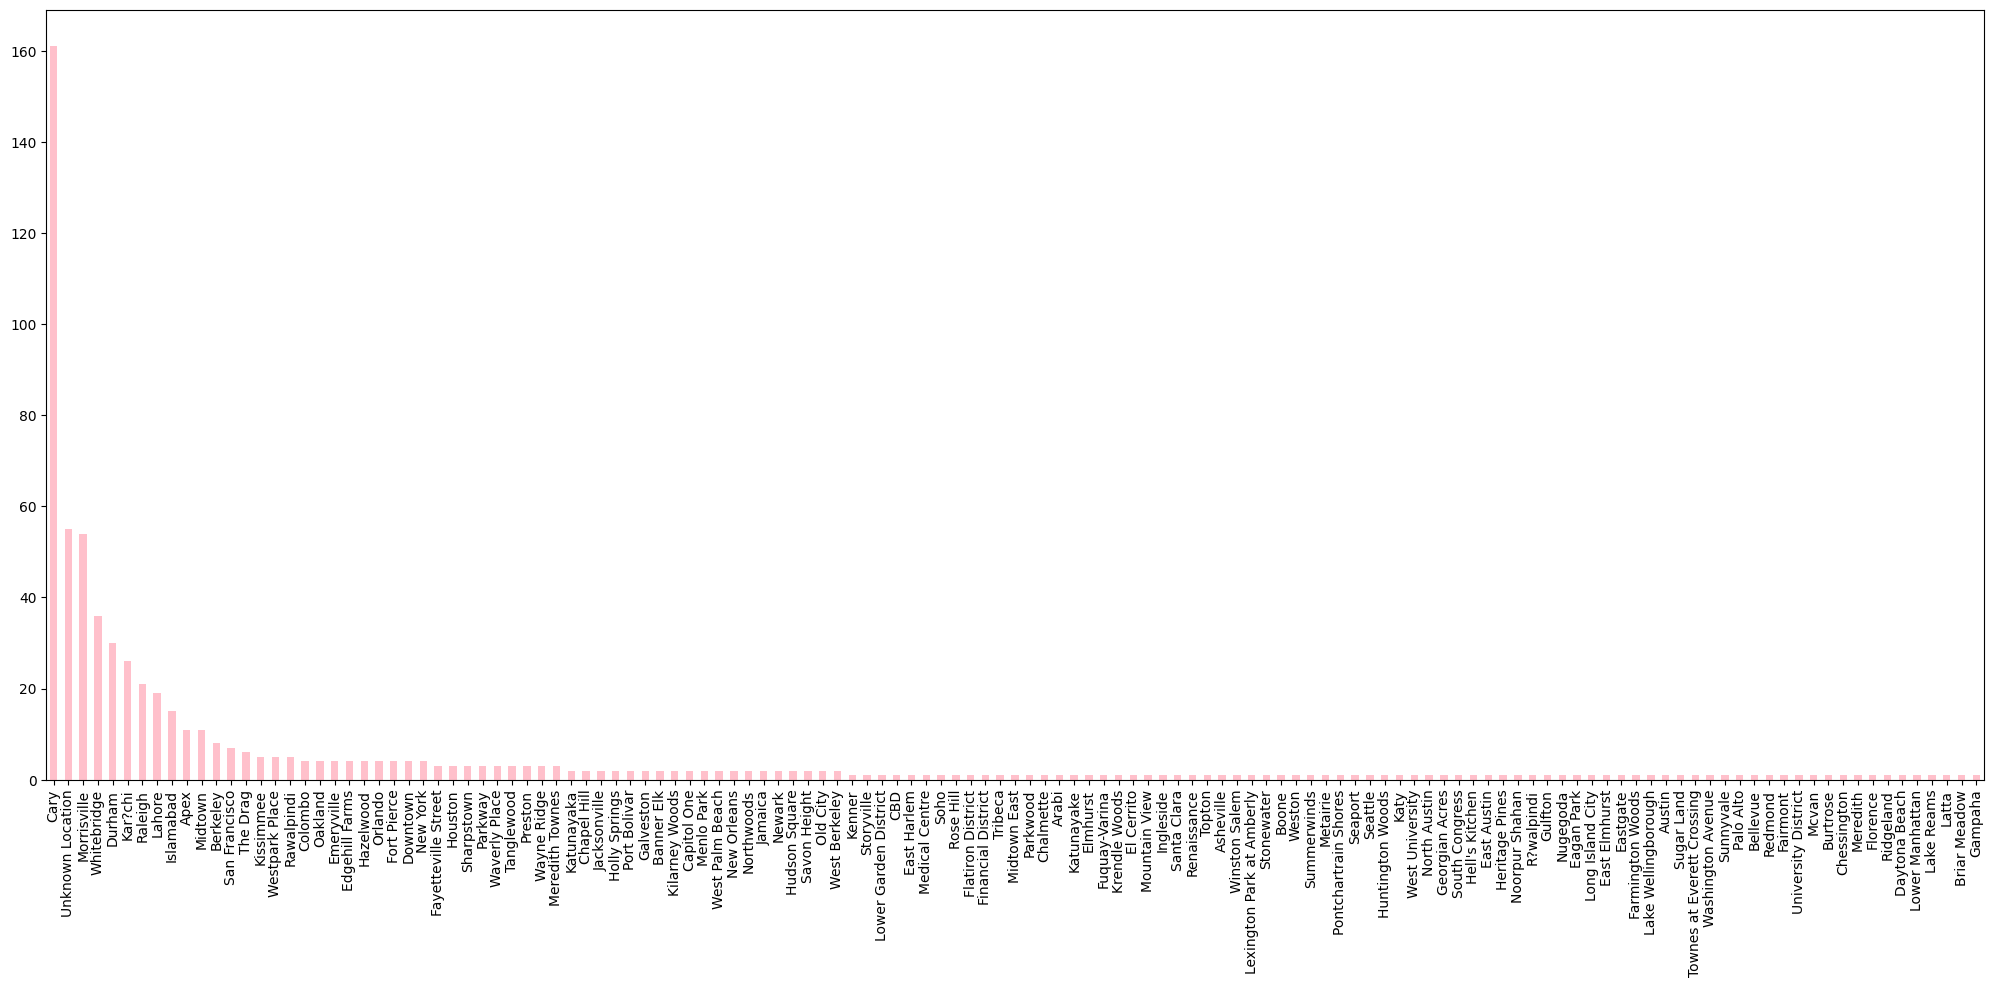

In [32]:
df['START*'].value_counts().plot(kind='bar',color='pink',figsize=(25,10))